<a href="https://colab.research.google.com/github/bhargav23/EVA4/blob/master/S9/EVA_S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
sys.path.append('/content/drive/My Drive/EVA/S7')
sys.path.append('/content/drive/My Drive/EVA/S7/images')


In [0]:
import albumentations as A
from evaAlbumentations import AlbumentationTransforms
import numpy as np


train_transforms = AlbumentationTransforms(
    [ A.Rotate((-30.0, 30.0)),
      A.HorizontalFlip(),
      A.RGBShift(r_shift_limit=50, g_shift_limit=50, b_shift_limit=50, p=0.5),
      A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
      A.Cutout(num_holes=6)])




test_transforms = AlbumentationTransforms([A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))])

In [5]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transforms)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
import evadataloader
dataloader = evadataloader.DataLoader()

trainloader = dataloader.load(trainset)
testloader = dataloader.load(testset)

Let us show some of the training images, for fun.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 bird horse  ship  deer


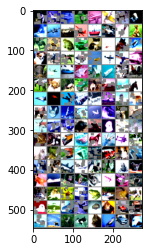

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import evamodel

net = evamodel.ResNet18()

In [0]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = net.to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
import copy

In [0]:
import evascheduler

In [13]:

from torch.optim.lr_scheduler import StepLR
from evascheduler import train,test

model =  net.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch,criterion)
    scheduler.step()
    test(model, device, testloader)


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.3307193517684937 Batch_id=390 Accuracy=42.02: 100%|██████████| 391/391 [00:54<00:00,  7.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3975, Accuracy: 6025/10000 (60.25%)

EPOCH: 1


Loss=1.1533845663070679 Batch_id=390 Accuracy=59.10: 100%|██████████| 391/391 [00:56<00:00,  6.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2816, Accuracy: 7184/10000 (71.84%)

EPOCH: 2


Loss=0.9523063898086548 Batch_id=390 Accuracy=66.41: 100%|██████████| 391/391 [00:56<00:00,  6.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3265, Accuracy: 6735/10000 (67.35%)

EPOCH: 3


Loss=0.7476621866226196 Batch_id=390 Accuracy=70.38: 100%|██████████| 391/391 [00:56<00:00,  6.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2811, Accuracy: 7189/10000 (71.89%)

EPOCH: 4


Loss=0.7221945524215698 Batch_id=390 Accuracy=73.33: 100%|██████████| 391/391 [00:56<00:00,  6.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2328, Accuracy: 7672/10000 (76.72%)

EPOCH: 5


Loss=0.779627799987793 Batch_id=390 Accuracy=75.33: 100%|██████████| 391/391 [00:56<00:00,  6.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2080, Accuracy: 7920/10000 (79.20%)

EPOCH: 6


Loss=0.6944988369941711 Batch_id=390 Accuracy=80.50: 100%|██████████| 391/391 [00:56<00:00,  6.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1519, Accuracy: 8481/10000 (84.81%)

EPOCH: 7


Loss=0.4633145332336426 Batch_id=390 Accuracy=81.78: 100%|██████████| 391/391 [00:56<00:00,  6.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1467, Accuracy: 8533/10000 (85.33%)

EPOCH: 8


Loss=0.3735995292663574 Batch_id=390 Accuracy=82.33: 100%|██████████| 391/391 [00:56<00:00,  6.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1434, Accuracy: 8566/10000 (85.66%)

EPOCH: 9


Loss=0.5358965396881104 Batch_id=390 Accuracy=83.05: 100%|██████████| 391/391 [00:56<00:00,  6.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1407, Accuracy: 8593/10000 (85.93%)

EPOCH: 10


Loss=0.5497150421142578 Batch_id=390 Accuracy=83.31: 100%|██████████| 391/391 [00:56<00:00,  6.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1425, Accuracy: 8575/10000 (85.75%)

EPOCH: 11


Loss=0.5313910841941833 Batch_id=390 Accuracy=83.89: 100%|██████████| 391/391 [00:56<00:00,  6.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1360, Accuracy: 8640/10000 (86.40%)

EPOCH: 12


Loss=0.5027605891227722 Batch_id=390 Accuracy=84.47: 100%|██████████| 391/391 [00:56<00:00,  6.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1343, Accuracy: 8657/10000 (86.57%)

EPOCH: 13


Loss=0.3046535551548004 Batch_id=390 Accuracy=84.38: 100%|██████████| 391/391 [00:56<00:00,  6.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1329, Accuracy: 8671/10000 (86.71%)

EPOCH: 14


Loss=0.542511522769928 Batch_id=390 Accuracy=84.56: 100%|██████████| 391/391 [00:56<00:00,  6.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1327, Accuracy: 8673/10000 (86.73%)

EPOCH: 15


Loss=0.23422667384147644 Batch_id=390 Accuracy=84.80: 100%|██████████| 391/391 [00:56<00:00,  6.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1332, Accuracy: 8668/10000 (86.68%)

EPOCH: 16


Loss=0.3810911178588867 Batch_id=390 Accuracy=84.66: 100%|██████████| 391/391 [00:56<00:00,  6.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1339, Accuracy: 8661/10000 (86.61%)

EPOCH: 17


Loss=0.7197507619857788 Batch_id=390 Accuracy=84.81: 100%|██████████| 391/391 [00:56<00:00,  6.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1341, Accuracy: 8659/10000 (86.59%)

EPOCH: 18


Loss=0.47813963890075684 Batch_id=390 Accuracy=84.87: 100%|██████████| 391/391 [00:56<00:00,  6.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1347, Accuracy: 8653/10000 (86.53%)

EPOCH: 19


Loss=0.48303651809692383 Batch_id=390 Accuracy=84.83: 100%|██████████| 391/391 [00:56<00:00,  6.90it/s]



Test set: Average loss: 0.1337, Accuracy: 8663/10000 (86.63%)



In [0]:
model_save_name = 'model.pt'
PATH = F"/content/drive/My Drive/EVA/S7/{model_save_name}" 
torch.save(model.state_dict(), PATH)

In [15]:
model_save_name = 'model.pt'
path = F"/content/drive/My Drive/EVA/S7/{model_save_name}"
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [0]:
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())


In [0]:
import grad_cam as gradcamAbs

In [0]:
config = dict(model_type='resnet', arch=model, layer_name='layer4')
means=(0.485, 0.456, 0.406)
stds=(0.229, 0.224, 0.225)
gcam = gradcamAbs.GradCamAbs(device, config, means, stds)

In [19]:
gradcam_images, pred_results = gcam.applyOnImages(dataloader=testloader, num_of_images=5)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


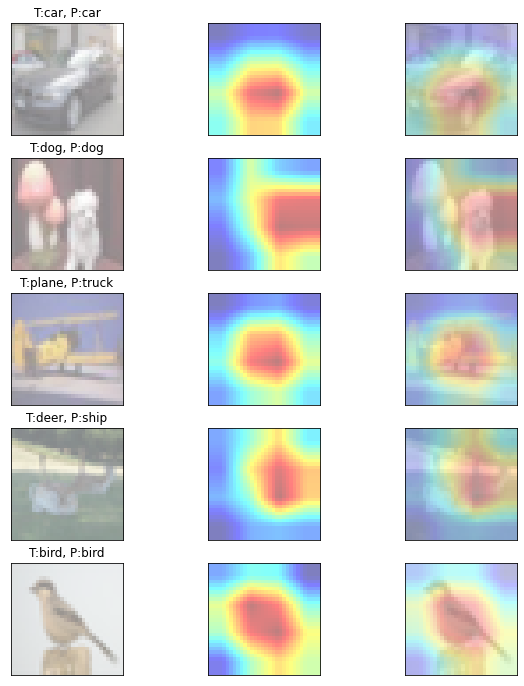

In [20]:
gcam.plot_results(gradcam_images, pred_results, classes, save_filename="gradcam_result")